# Pymaceuticals Inc.
---

### Analysis

#### Average Tumor Volume and Weight
There appears to be a positive correlation between the weight of the mouse and the average tumor volume. In general, the average tumor volume increased with the weight of the mouse. We can also assume the linear relationship base on the fit of the linear regression model to the data.

#### Distribution of Tumor Volume 
Infubinol and Ceftamin had higher values for their final tumor volume than Capomulin or Ramicane. For example, the upper limit for Capomulin was around 48 (mm3) but the lower limit for Infubinol was around 45 (mm3). It would be interesting to do some further analysis on the efficacy of the Infubinol and Ceftamin as compared to the other drug regimens
 

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files


mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")

# Display the data table for preview
combined_df





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [176]:
# Checking the number of mice.
no_of_mice = len(combined_df["Mouse ID"].unique())

In [177]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

mousetime_concat = []

for i in range(len(combined_df["Mouse ID"])):
    mousetime_concat.append(combined_df["Mouse ID"][i] + str(combined_df["Timepoint"][i]))

    
duplicate_mousetime = [mouse for mouse in mousetime_concat if mousetime_concat.count(mouse)>1]
duplicate_mousetime



['g9890',
 'g9890',
 'g9895',
 'g9895',
 'g98910',
 'g98910',
 'g98915',
 'g98915',
 'g98920',
 'g98920']

In [178]:
# Optional: Get all the data for the duplicate mouse ID.


In [179]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df.loc[combined_df["Mouse ID"]!="g989", :]
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [180]:
# Checking the number of mice in the clean DataFrame.
no_of_mice_clean = len(clean_combined_df["Mouse ID"].unique())
no_of_mice_clean

248

## Summary Statistics

In [181]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

grouped_combined_clean = clean_combined_df.groupby(["Drug Regimen"])

# calculating mean tumor volume
mean_tumor_volume = grouped_combined_clean["Tumor Volume (mm3)"].mean()
mean_tumor_volume.name = "Mean Tumor Volume"

# calculating median tumor volume
median_tumor_volume = grouped_combined_clean["Tumor Volume (mm3)"].median()
median_tumor_volume.name = "Median Tumor Volume"

# calculating variance of tumor volume
var_tumor_volume = grouped_combined_clean["Tumor Volume (mm3)"].var()
var_tumor_volume.name = "Tumor Volume Variance"

# calculating standard deviation of tumor volume
std_tumor_volume = grouped_combined_clean["Tumor Volume (mm3)"].std()
std_tumor_volume.name = "Tumor Volume Std. Dev."

# calculating SEM of tumor volume
# sem_tumor_volume = st.sem(clean_combined_df["Tumor Volume (mm3)"])
sem_tumor_volume = grouped_combined_clean["Tumor Volume (mm3)"].sem()
sem_tumor_volume.name = "Tumor Volume Std. Err."

summary_stats_df = pd.concat([mean_tumor_volume,median_tumor_volume,var_tumor_volume,std_tumor_volume,sem_tumor_volume], axis=1)

summary_stats_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [182]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = grouped_combined_clean["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

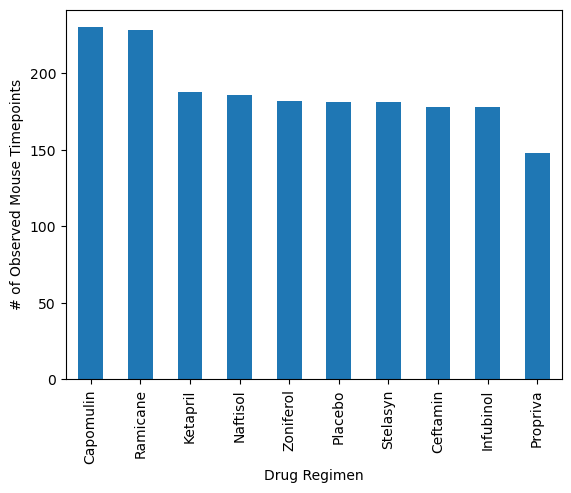

In [183]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_timepoints = grouped_combined_clean["Mouse ID"].count().sort_values(ascending=False)
total_timepoints.plot(kind="bar", ylabel= "# of Observed Mouse Timepoints")
plt.show()

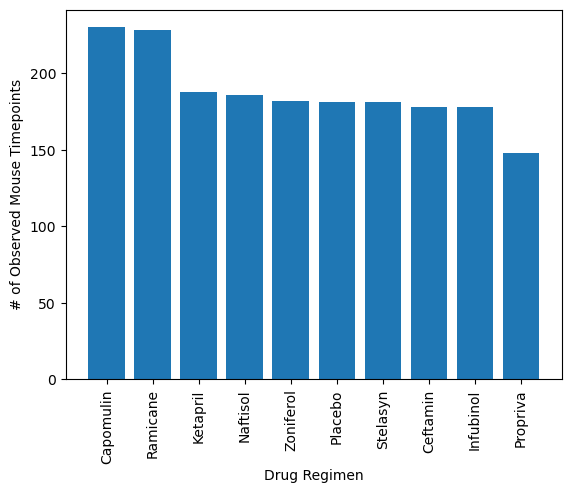

In [184]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = total_timepoints.index
plt.bar(drug_regimen,total_timepoints)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

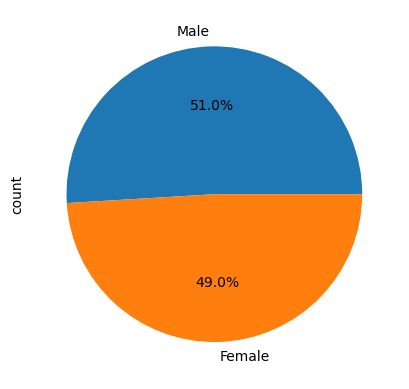

In [185]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender = clean_combined_df["Sex"].value_counts()
# Make the pie chart
mice_gender.plot(kind="pie",autopct = "%1.1f%%")
plt.show()

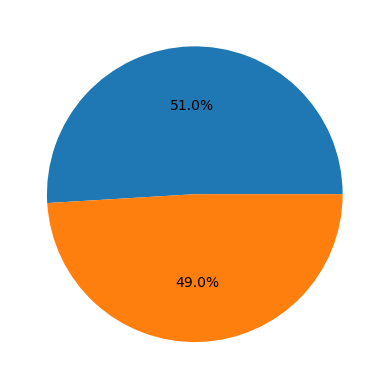

In [186]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender = clean_combined_df["Sex"].value_counts()

# Make the pie chart
plt.pie(mice_gender,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [187]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_treatment_df = clean_combined_df.loc[clean_combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]), :]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_grouped = reduced_treatment_df.groupby(["Mouse ID"])
max_timepoint = max_timepoint_grouped["Timepoint"].max()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_max_timepoint = pd.merge(max_timepoint,reduced_treatment_df,on="Mouse ID",how="outer")
merged_max_timepoint = merged_max_timepoint.rename(columns={"Timepoint_x":"Max Timepoint","Timepoint_y":"Timepoint"})
final_tumor_df = merged_max_timepoint.loc[merged_max_timepoint["Max Timepoint"]==merged_max_timepoint["Timepoint"], :]
final_tumor_df = final_tumor_df.rename(columns={"Tumor Volume (mm3)":"Final Tumor Volume (mm3)"})
final_tumor_df.reset_index(drop=True,inplace=True)




Sorry, I did not use the approach below because I do not understand it. I have used a different approach in the cell below.

In [188]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Calculating Outliers

In [189]:
# Capmulin Calculations
reduced_capomulin = final_tumor_df[final_tumor_df["Drug Regimen"] == "Capomulin"]
capomulin_lowerq = reduced_capomulin["Final Tumor Volume (mm3)"].quantile(0.25)
capomulin_upperq = reduced_capomulin["Final Tumor Volume (mm3)"].quantile(0.75)
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
capomulin_outliers = reduced_capomulin.loc[((reduced_capomulin["Final Tumor Volume (mm3)"]< capomulin_lower_bound)|(reduced_capomulin["Final Tumor Volume (mm3)"] > capomulin_upper_bound)),"Final Tumor Volume (mm3)"]


# Ramicane Calculations
reduced_ramicane= final_tumor_df[final_tumor_df["Drug Regimen"] == "Ramicane"]
ramicane_lowerq = reduced_ramicane["Final Tumor Volume (mm3)"].quantile(0.25)
ramicane_upperq = reduced_ramicane["Final Tumor Volume (mm3)"].quantile(0.75)
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
ramicane_outliers = reduced_ramicane.loc[((reduced_ramicane["Final Tumor Volume (mm3)"]< ramicane_lower_bound)|(reduced_ramicane["Final Tumor Volume (mm3)"] > ramicane_upper_bound)),"Final Tumor Volume (mm3)"]

# Infubinol Calculations
reduced_infubinol = final_tumor_df[final_tumor_df["Drug Regimen"] == "Infubinol"]
infubinol_lowerq = reduced_infubinol["Final Tumor Volume (mm3)"].quantile(0.25)
infubinol_upperq = reduced_infubinol["Final Tumor Volume (mm3)"].quantile(0.75)
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
infubinol_outliers = reduced_infubinol.loc[((reduced_infubinol["Final Tumor Volume (mm3)"]< infubinol_lower_bound)|(reduced_infubinol["Final Tumor Volume (mm3)"] > infubinol_upper_bound)),"Final Tumor Volume (mm3)"]


# Ceftamin Calculations
reduced_ceftamin = final_tumor_df[final_tumor_df["Drug Regimen"] == "Ceftamin"]
ceftamin_lowerq = reduced_ceftamin["Final Tumor Volume (mm3)"].quantile(0.25)
ceftamin_upperq = reduced_ceftamin["Final Tumor Volume (mm3)"].quantile(0.75)
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
ceftamin_outliers = reduced_ceftamin.loc[((reduced_ceftamin["Final Tumor Volume (mm3)"]< ceftamin_lower_bound)|(reduced_ceftamin["Final Tumor Volume (mm3)"] > ceftamin_upper_bound)),"Final Tumor Volume (mm3)"]


# Print statements
print(f"Capomulin's potential outliers: {capomulin_outliers} ")
print(f"Ramicane's potential outliers: {ramicane_outliers} ")
print(f"Infubinol's potential outliers: {infubinol_outliers}")
print(f"Ceftamin's potential outliers: {ceftamin_outliers}")

Capomulin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64) 
Ramicane's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64) 
Infubinol's potential outliers: 15    36.321346
Name: Final Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Final Tumor Volume (mm3), dtype: float64)


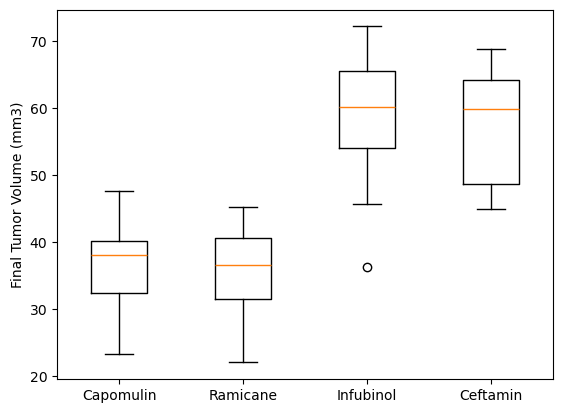

In [190]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
tumor_volume = [reduced_capomulin["Final Tumor Volume (mm3)"], reduced_ramicane["Final Tumor Volume (mm3)"], reduced_infubinol["Final Tumor Volume (mm3)"],reduced_ceftamin["Final Tumor Volume (mm3)"]]
fig1, ax1 = plt.subplots()
bplot = ax1.boxplot(tumor_volume, labels=treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

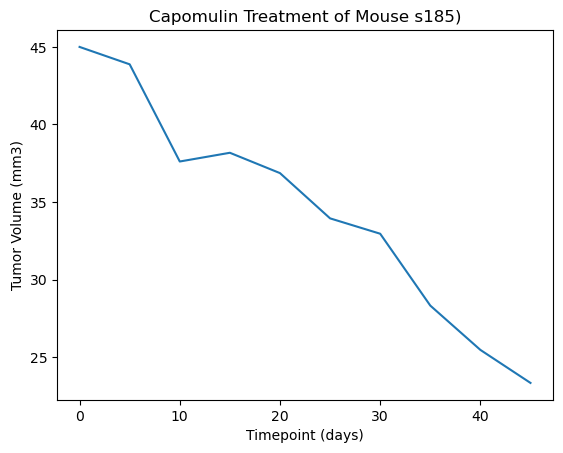

In [191]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_treatment = reduced_treatment_df.loc[reduced_treatment_df["Drug Regimen"]== "Capomulin"]

#selecting mouse # s185
mouse185_timepoint = capomulin_treatment.loc[capomulin_treatment["Mouse ID"]=="s185", "Timepoint"]
mouse185_tumorvol = capomulin_treatment.loc[capomulin_treatment["Mouse ID"]=="s185", "Tumor Volume (mm3)"]

# Creating line graph

plt.plot(mouse185_timepoint,mouse185_tumorvol)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185)")
plt.show()


In [192]:
capomulin_treatment.sort_values(["Weight (g)"])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
22,x401,Capomulin,Female,16,15,10,39.113891,0
29,x401,Capomulin,Female,16,15,45,28.484033,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
...,...,...,...,...,...,...,...,...
382,r944,Capomulin,Male,12,25,5,45.737145,0
381,r944,Capomulin,Male,12,25,0,45.000000,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
390,r944,Capomulin,Male,12,25,45,41.581521,2


In [193]:
ttfff = capomulin_treatment.groupby(["Mouse ID"])
tthhhkk = ttfff["Tumor Volume (mm3)"].mean()
tthhhkk

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [194]:
len(tthhhkk)

25

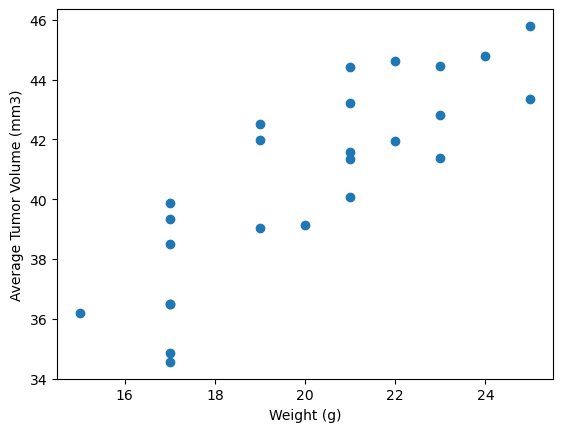

In [195]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_treatment
# calculate for values for y-axis
capomulin_group = capomulin_treatment.groupby(["Mouse ID"])
capomulin_avg_tumor = capomulin_group["Tumor Volume (mm3)"].mean()

# calculate values for x-axis
capomulin_weight = capomulin_group["Weight (g)"].mean()

# create scatterplot

plt.scatter(capomulin_weight,capomulin_avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


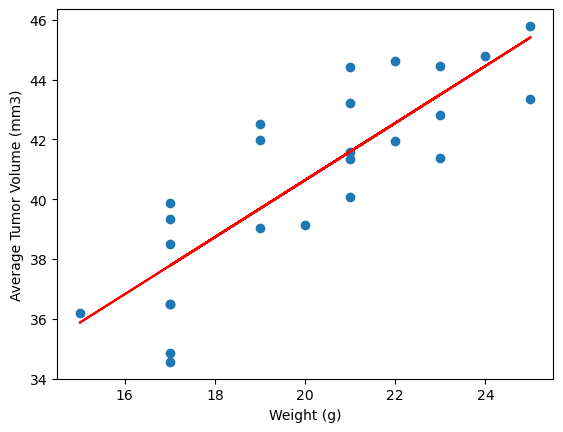

In [196]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculating correlation
correlation = st.pearsonr(capomulin_weight,capomulin_avg_tumor)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculating linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_weight,capomulin_avg_tumor)
regress_values = capomulin_weight * slope + intercept

# Deriving linera equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting values
plt.scatter(capomulin_weight,capomulin_avg_tumor)
plt.plot(capomulin_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()